In [1]:
#import 
import logging
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from umap import UMAP
import matplotlib.pyplot as plt
from reval.best_nclust_cv import FindBestClustCV

In [ ]:
# define function for the grid search of models Hyperparameters
def Gridsearch(X_tr,strat_vect):

    
    # GRID SEARCH
    
    # initialize impty saving matrices
    #metric_df = pd.DataFrame()
    metric_dict ={'fold': [],"n_neigh":[],'ncl':[],'stab':[],'err':[]}
    
    
    # define params to test
    # KMEANS
    clust = KMeans(random_state=42)
    vect_hyper = [5,10,15]
    
    
    vect_fold = [2]
    
    # run the grid search
    for f in vect_fold:
        for n in vect_hyper:
            logging.info(f"fold:{f} -- nighbors:{n}")
            clf = KNeighborsClassifier(n_neighbors=n)
            #clf = RandomForestClassifier(n_estimators=n)
            relval = FindBestClustCV(s=clf, c=clust, nfold=f, nclust_range=list(range(2,11,1)), nrand=100)
            metric, ncl = relval.best_nclust(X_tr,iter_cv=100, strat_vect = strat_vect) 
            metric_dict['fold'].append(f)
            metric_dict['n_neigh'].append(n)
            metric_dict['ncl'].append(ncl)
            metric_dict['stab'].append(metric['val'][ncl][0])
            metric_dict['err'].append(metric['val'][ncl][1][1])

    metric_df = pd.DataFrame(metric_dict)

    return metric_df


In [2]:
# define paths
main_path = '/Users/vmandelli/OneDrive - Fondazione Istituto Italiano Tecnologia/multiple_measures_oct23'
data_path = os.path.join(main_path,'results','data_cleaning')
results_path = os.path.join(main_path,"results","reval_lastcall")
plot_path = os.path.join(main_path,"plot")

In [3]:
# load file
file = 'df_VABS_MSEL_betacorrected_oct23.csv'
df = pd.read_csv(os.path.join(data_path,file),
                        header=0,
                        #skiprows=[1],
                        low_memory=False,
                        index_col='subjectkey')

df.drop('Unnamed: 0', 1, inplace = True)
df.head(10)

/var/folders/rh/77kk2d3j49zb39gx51f0mvzr0000gq/T/ipykernel_58399/441183162.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop('Unnamed: 0', 1, inplace = True)


,interview_age_VABS,collection_id,interview_age_MELS,DQ_VR,DQ_FM,DQ_RL,DQ_EL,DQ_GM,communicationdomain_totalb,livingskillsdomain_totalb,...,format,mean_age_round,age_years_round,quantile_age,TR_TS,new_communicationdomain_totalb,new_livingskillsdomain_totalb,new_socializationdomain_totalb,new_motorskillsdomain_totalb,new_composite_totalb
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDARBW232LZB,31,2108,31,81.0,74.0,55.0,65,NaN,81.0,85,...,interview,31,3,1,tr,81.000000,85.000000,91.000000,102.000000,NaN
NDARGN640MEB,26,2368,26,88.0,77.0,42.0,50,NaN,71.0,75,...,survey,26,2,0,tr,75.114274,76.097414,77.081418,92.312881,76.483174
NDARDY828RLQ,46,2108,46,50.0,46.0,28.0,33,NaN,72.0,71,...,interview,46,4,2,tr,72.000000,71.000000,75.000000,70.000000,NaN
NDARLC161VEK,37,2108,37,46.0,30.0,27.0,32,NaN,52.0,66,...,interview,37,3,1,tr,52.000000,66.000000,53.000000,75.000000,NaN
NDARNZ917EF3,26,16,26,92.0,92.0,92.0,135,NaN,97.0,104,...,interview,26,2,0,tr,97.000000,104.000000,91.000000,93.000000,95.000000
NDARJK346CEA,24,8,24,100.0,108.0,112.0,112,83.0,94.0,96,...,survey,24,2,0,tr,98.114274,97.097414,89.081418,28.312881,91.483174
NDARPB170XUW,51,14,51,39.0,43.0,22.0,33,65.0,72.0,71,...,survey,51,4,3,tr,76.114274,72.097414,68.081418,65.312881,67.483174
NDARAN793KFZ,32,2026,32,103.0,106.0,112.0,109,NaN,101.0,85,...,survey,32,3,1,tr,105.114274,86.097414,87.081418,104.312881,93.483174
NDARMY583NWD,36,2557,36,58.0,56.0,64.0,56,NaN,76.0,82,...,interview,36,3,1,tr,76.000000,82.000000,70.000000,108.000000,81.000000


In [4]:
# define train and test
X_tr_split = df[df['TR_TS']=='tr'].copy()
X_ts_split = df[df['TR_TS']=='ts'].copy()
stract_vect = X_tr_split['sex'] + X_tr_split['format'] + X_tr_split['quantile_age'].astype("str")

In [5]:
# check strat vect
stract_vect.value_counts()
# change the unique female (as used for the intial split)
stract_vect[stract_vect == 'Finterview3']='Finterview2'
stract_vect.value_counts()

Msurvey3       76
Msurvey0       58
Msurvey2       57
Msurvey1       49
Minterview0    27
Minterview1    21
Finterview2    20
Finterview1    19
Fsurvey3       17
Minterview2    16
Fsurvey2       15
Fsurvey0       13
Finterview0    13
Fsurvey1        7
Minterview3     4
dtype: int64

In [6]:
# define columns to use
vabs_names = ['new_communicationdomain_totalb','new_livingskillsdomain_totalb',
              'new_socializationdomain_totalb','new_motorskillsdomain_totalb']
mels_names = ["DQ_VR", "DQ_FM",
               "DQ_RL",  "DQ_EL"]
col2use = vabs_names + mels_names +['mean_age_round']

In [7]:
X_tr_split[col2use]

,new_communicationdomain_totalb,new_livingskillsdomain_totalb,new_socializationdomain_totalb,new_motorskillsdomain_totalb,DQ_VR,DQ_FM,DQ_RL,DQ_EL,mean_age_round
subjectkey,,,,,,,,,
NDARBW232LZB,81.000000,85.000000,91.000000,102.000000,81.0,74.0,55.0,65,31
NDARGN640MEB,75.114274,76.097414,77.081418,92.312881,88.0,77.0,42.0,50,26
NDARDY828RLQ,72.000000,71.000000,75.000000,70.000000,50.0,46.0,28.0,33,46
NDARLC161VEK,52.000000,66.000000,53.000000,75.000000,46.0,30.0,27.0,32,37
NDARNZ917EF3,97.000000,104.000000,91.000000,93.000000,92.0,92.0,92.0,135,26
...,...,...,...,...,...,...,...,...,...
NDARJB209ARY,95.114274,97.097414,87.081418,98.312881,104.0,88.0,104.0,88,24
NDAR_INVTE7RRF0W,88.114274,99.097414,89.081418,74.312881,59.0,65.0,88.0,79,34
NDARAG178TF0,95.114274,72.097414,75.081418,72.312881,58.0,66.0,72.0,78,49


In [8]:
# imputation
impute = KNNImputer(n_neighbors=5)

# scaling  
Scaler = StandardScaler()

#umap
Umap = UMAP(n_neighbors=30, min_dist=0.0, n_components=2, random_state=42)

#preprocessing
# impute then scale than UMAP
X_tr_prepr = pd.DataFrame(Umap.fit_transform(Scaler.fit_transform(impute.fit_transform(X_tr_split[col2use]))), index = X_tr_split.index)
X_ts_prepr = pd.DataFrame(Umap.transform(Scaler.transform(impute.transform(X_ts_split[col2use]))), index = X_ts_split.index)


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


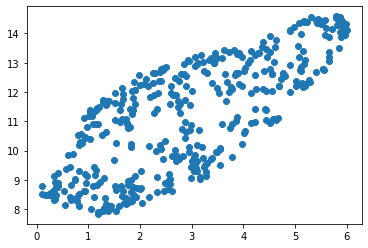

In [11]:
plt.scatter(X_tr_prepr[[0]], X_tr_prepr[[1]])

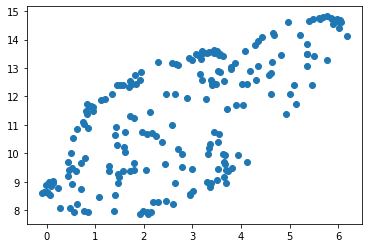

In [12]:
plt.scatter(X_ts_prepr[[0]], X_ts_prepr[[1]])

In [13]:
# define dataset to use
X_tr = X_tr_prepr
X_ts = X_ts_prepr
X_tr_indx = X_tr.index
strat_vect = stract_vect

In [14]:
strat_vect.shape

(412,)

In [ ]:
# run grid search
metric = Gridsearch(X_tr , strat_vect)

In [ ]:
#check grid search results
metric_df_vabs_mels = metric
mean_stab_err = list(metric[["stab","err"]].apply(np.mean,1))
idx = mean_stab_err.index(min(mean_stab_err))
num_neigh = pd.to_numeric(metric.loc[idx]['n_neigh']).astype(np.int64)

In [ ]:
metric_df_vabs_mels

In [ ]:
# save
metric_df_vabs_mels.to_csv( os.path.join(results_path, 'grid_search_oct23_AGE.csv'))

In [16]:
#num_neigh
num_neigh = 5

In [ ]:
 ##### mi fermo qui

In [17]:
from reval import best_nclust_cv
# run reval (only the train)
# classifcation algorhythm
clf = KNeighborsClassifier(n_neighbors= num_neigh)      #KNN  
# cluster algorhythm
clust = KMeans(random_state=42)                #Kmeans

# initialize the class
relval = FindBestClustCV(s=clf, c=clust, nfold=2, nclust_range=list(range(2,10,1)), nrand=100)
    
# train
metric, ncl = relval.best_nclust(X_tr,iter_cv=100, strat_vect = strat_vect)
print(metric)
print(ncl)

out = relval.evaluate(X_tr, X_ts, ncl) # riscrivi NCL qui! il best!

logging.info(f"Training ACC: {out.train_acc}, Test ACC: {out.test_acc}")

10:15:02, INFO Training ACC: 0.9951456310679612, Test ACC: 0.9802955665024631


{'train': {2: (0.004660194174757279, (0.004660194174757279, 0.0006234698433983605)), 3: (0.013179611650485434, (0.013179611650485434, 0.0010581463320206803)), 4: (0.011723300970873776, (0.011723300970873776, 0.0009263133510881153)), 5: (0.017305825242718446, (0.017305825242718446, 0.0010989281269240061)), 6: (0.01946601941747572, (0.01946601941747572, 0.001212720931134304)), 7: (0.020558252427184454, (0.020558252427184454, 0.0012388620246212892)), 8: (0.020946601941747578, (0.020946601941747578, 0.001320494742687935)), 9: (0.021941747572815525, (0.021941747572815525, 0.0013054590146345697))}, 'val': {2: (0.0637707512860967, (0.0637707512860967, 0.005979186297085014)), 3: (0.27768955880532054, (0.27768955880532054, 0.01271961137265553)), 4: (0.28975663762466775, (0.28975663762466775, 0.029660743762144063)), 5: (0.19770032984023278, (0.19770032984023278, 0.01624785238140944)), 6: (0.16420112067211612, (0.16420112067211612, 0.010783605178200194)), 7: (0.3137422759450887, (0.31374227594508

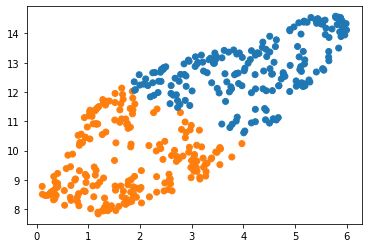

In [18]:
#umap plot train
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

plt.scatter(X_tr_prepr[[0]], X_tr_prepr[[1]], color=[colors[lab] for lab in out.train_cllab])

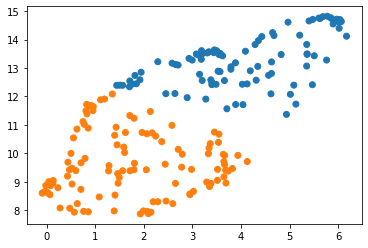

In [19]:
#umap plot test
plt.scatter(X_ts_prepr[[0]], X_ts_prepr[[1]], color=[colors[lab] for lab in out.test_cllab])

In [20]:
for table in metric.keys():
    data = pd.DataFrame(columns=['k','value','CI'])
    for row in metric[table]:
        _dict_append = {'k':row,
                     'value':metric[table][row][1][0],
                     'CI':metric[table][row][1][1]}
        data= data.append(_dict_append,ignore_index=True)
        
    data.to_csv(os.path.join(results_path,'_'.join([table,'metrics_reval_oct23_AGE_gridsearch.csv'])))

In [21]:
X_tr_split['cluster_domain']=  out.train_cllab
X_tr_split["TR_TS"] = "TR"


X_ts_split['cluster_domain']=  out.test_cllab
X_ts_split["TR_TS"] = "TS"
X_ts_split

,interview_age_VABS,collection_id,interview_age_MELS,DQ_VR,DQ_FM,DQ_RL,DQ_EL,DQ_GM,communicationdomain_totalb,livingskillsdomain_totalb,...,mean_age_round,age_years_round,quantile_age,TR_TS,new_communicationdomain_totalb,new_livingskillsdomain_totalb,new_socializationdomain_totalb,new_motorskillsdomain_totalb,new_composite_totalb,cluster_domain
subjectkey,,,,,,,,,,,,,,,,,,,,,
NDARWW577VFF,64,14,66,70.0,68.0,56.0,59,52.0,76.0,87,...,65,5,3,TS,80.114274,88.097414,95.081418,80.312881,82.483174,1
NDARUP211EPY,38,1358,38,61.0,55.0,79.0,61,NaN,85.0,66,...,38,3,1,TS,85.000000,66.000000,70.000000,84.000000,73.000000,1
NDARTF785RL0,24,2557,24,79.0,75.0,42.0,29,71.0,66.0,91,...,24,2,0,TS,66.000000,91.000000,78.000000,95.000000,79.000000,1
NDARHE708DJR,52,2262,52,25.0,31.0,19.0,10,NaN,42.0,46,...,52,4,3,TS,46.114274,47.097414,54.081418,58.312881,49.483174,0
NDARGZ156WK4,39,2108,39,77.0,77.0,38.0,44,NaN,67.0,69,...,39,3,2,TS,67.000000,69.000000,72.000000,97.000000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDARGX724TF6,40,1358,40,62.0,68.0,70.0,98,NaN,116.0,93,...,40,3,2,TS,116.000000,93.000000,74.000000,97.000000,94.000000,1
NDARKZ286ZC7,49,14,50,46.0,52.0,22.0,32,66.0,69.0,66,...,50,4,3,TS,73.114274,67.097414,68.081418,77.312881,67.483174,0
NDARXR653RKB,59,14,59,36.0,39.0,15.0,22,46.0,52.0,53,...,59,5,3,TS,56.114274,54.097414,68.081418,77.312881,61.483174,0


In [23]:
results_path

'/Users/vmandelli/OneDrive - Fondazione Istituto Italiano Tecnologia/multiple_measures_oct23/results/reval_lastcall'

In [24]:
dataset_trts_cl = X_tr_split.append(X_ts_split)
dataset_trts_cl.to_csv(os.path.join(results_path,'dataset_reval_clusters_oct23_AGE_grid_search.csv'))